# Constraint hypothesis testing
Decide what hypothesis testing approach to take for the constraint annotations.

In [1]:
# Imports
from scipy.stats import binomtest
from statsmodels.stats.proportion import proportions_chisquare
import numpy as np
import matplotlib.pyplot as plt
from src import constants as C

In [2]:
def binom_p(**kwargs):
    """Get p value for one-sided binomial test."""
    
    kwargs.setdefault("k", 0)
    kwargs.setdefault("n", 10)
    kwargs.setdefault("p", 0.5)
    kwargs.setdefault("alternative", "less")

    return binomtest(**kwargs).pvalue

In [3]:
def chisquare_p(**kwargs):
    """Get p value for Chi squared test of proportions."""
    
    kwargs.setdefault("count", 0)
    kwargs.setdefault("nobs", 10)
    kwargs.setdefault("value", 0.5)

    return proportions_chisquare(**kwargs,)[1]

In [4]:
# Create ranges of data
observations = np.linspace(1,20,num=20)
expected_proportions = np.linspace(0.01,1)

In [5]:
# Get p values for different scenarios
# NB default arguments in the functions above
obs_binom = [binom_p(n=int(_)) for _ in observations]
obs_X2 = [chisquare_p(nobs=int(_)) for _ in observations]

prop_binom = [binom_p(p=_) for _ in expected_proportions]
prop_X2 = [chisquare_p(value=_) for _ in expected_proportions]

/mnt/iusers01/bk01/m40482ab/miniforge3/envs/ukb/lib/python3.8/site-packages/scipy/stats/_stats_py.py:7407: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


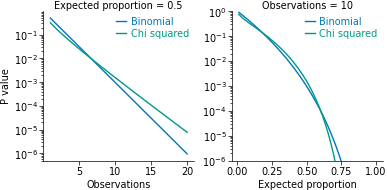

In [6]:
# Set plotting style
plt.style.use(C.STYLE_DEFAULT)
plt.style.use(C.COLOR_VIBRANT)

# Instantiate the figure
fig, axs = plt.subplots(1,2, figsize=(10*C.CM,5*C.CM), layout="constrained")
ax1, ax2 = axs.flatten()

# Plot p values for varying numbers of observations
ax1.plot(observations, obs_binom, "-", label="Binomial")
ax1.plot(observations, obs_X2, "-", label="Chi squared")
ax1.set_yscale("log")
ax1.legend()
ax1.set_title("Expected proportion = 0.5")
ax1.set_xlabel("Observations")
ax1.set_ylabel("P value");

# Plot p values for different values of "expected proportion"
ax2.plot(expected_proportions, prop_binom, "-", label="Binomial")
ax2.plot(expected_proportions, prop_X2, "-", label="Chi squared")
ax2.set_yscale("log")
ax2.set_ylim(10**-6, 1)
ax2.set_xlabel("Expected proportion")
ax2.set_title("Observations = 10")
ax2.legend()

## Varying the number of observations
The power of both statistical tests increases as the number of observations increases. The rate of increase is greatest for the one-sided binomial test.

The crossover point occurs at ~7 observations. This equates to the number of possible variants being >7, which is probably true for all reasonably powered regions.

## Varying the expected proportion
The power of both tests increases at the number of observations increases. Broadly, the rate of increase is greatest for the Chi-squared test.

In this scenario there are two cross-over points. The binomial test has greater power where the expected proportion lies between ~0.2 and ~0.6 (which is typical for most regions).

# Conclusion
Perform hypothesis testing with a binomial test. It will probably have greater power as we are able to use a one-sided test. We can also more readily achieve the formal conditions for this test.